## Introduction

Finally it's Friday night, and you want to watch a romantic movie to relax, so you go to Netflix and filter by movie category to browse only the romantic movies. You may be wondering how those movies are classified: is there a standard for a movie to be tagged as romantic movie instead of action movie? Probably not. We know that movies in the same category have some similar features. Can we find the features in romantic movie that can be used to differentiate them from action movies? One simple idea is that romantic movies commonly have kiss scenes while action movies have fight scenes. Although we can't simply define any movie with kiss scene to be romantic movie because they might exist in action movies as well, we may use an algorithm to categorize movies based on the frequencies of kiss scenes and fight scenes. 

This tutorial will introduce you to Nearest Neighbor algorithm, particularly K-Nearst Neighbor (KNN) model, which is one of the easiest classification algorithms in machine learning and commonly used for its easy of interpretation and low calculation time. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

## Tutorial content

In this tutorial, you will learn how the K-Nearst Neighbor algorithm works and how to implement a K-nearest neighbor model of learning. 

We will cover the following topics in this tutorial:
* Feature vectors
* K-nearest neighbor model
* Psuedo code implementation
* Pitfalls in using KNN
* Example application
* Further reading resource

### Feature vectors

Let's start with a quick review of feature vectors. We have learned that decomposing an input into a collection of features (x1, x2... xn) forms a useful abstraction for learning. In a geometic view of data, we can use one dimension to represent one feature, so that every test data can be viewed as points in a high-dimensional space and perform geometric operations on those points. 

Back to our movie classification story. We are trying to predict a movie theme by mapping inputs (number of kiss scenes, number of fight scense, etc.) to outputs (movie tags). We can use the convention that for binary features (yes/no features), the corresponding feature values are -1 and 1, respectively. For categorical features (action movie, romantic movie, thriller, etc.), we can arbitrarily map action movie to a value of 0, romantic movie to a value of 1, thriller to a value of 2, ect. The problem with this mapping is that it turns an unordered set (the set of movies) into an ordered set. As a result, when we go to use these features in KNN, we will measure examples based on their distances to each other. By doing this mapping, we are mistakenly asserting that action and romantic movies are more similar (distance of 1) than action movies and thriller (distance of 2). A solution is to turn a categorical feature that can take the three different values into three binary features (say: IsItActionMovie?, IsItRomanticMovie?, IsItThriller?). In general, if we start from a categorical feature that takes V values, we can map it to V-many binary indicator features.

## K-nearest neighbor model

The biggest advantage to thinking of data points as vectors in a high dimensional space is that it allows us to apply geometric concepts to machine learning algorithms. For instance, one of the most basic things that one can do in a vector space is compute distances. K-nearest neighbor relies on Euclidean distance between vectors as weights to predict output. (see Figure 1 for calculating Euclidean distance between vector a and b)
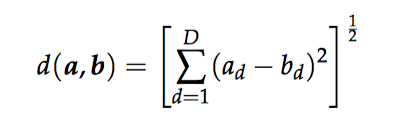
(Figure 1)

As indicated by its name, the nearest neighbor classiﬁer is build on the inductive bias that the label of any data point should be similar to the label of nearby points. At training time, we simply store the entire training set. At test time, we get a test example x-hat. To predict its label, we ﬁnd the training example x that is most similar to x-hat. In particular, we ﬁnd the training example x that minimizes the distance between x and x-hat. Since x is a training example, it has a corresponding label, y. We predict that the label of x-hat is also y.

Despite its simplicity, the nearest neighbor classiﬁer is particularly prone to overﬁtting label noise since the nearest neighbor algorithm only looks at the single nearest neighbor. Take Figure 2 as an example, the test point would be mistakenly labeled as positive by only considering the label of the nearest point around it, which is positive.

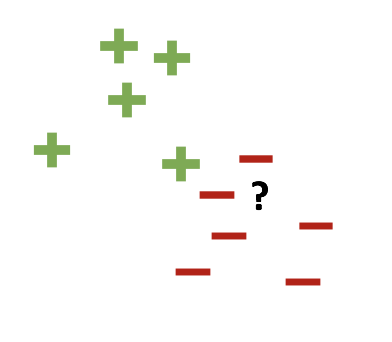
(Figure 2)

A solution to this problem is to consider more than just the single nearest neighbor when making a classiﬁcation decision. We can consider the K-nearest neighbors and let them vote on the majority class for this test point. If you consider the 3-nearest neighbors of the test point in Figure 2, you will see that two of them are negative and one is positive. Through voting, negative would win.

## Psuedo code implementation

Below is the psuedo code implementation for KNN algorithm:
```
S ← []
for n = (1 to N) do:
    S ← S.append((x'n, x-hat),n) // store distance to training example n
Sort(S)                          // put lowest-distance objects ﬁrst
y-hat ← 0
for k = (1 to K) do:
    (dist, n) ← S'k           // n this is the kth closest data point
    y-hat ← y-hat + y'n       // vote according to the label for the nth training point
return sign(y-hat)
```
The ﬁrst step in this algorithm is to compute distances from the test point to all training points (lines 2-4). The data points are then sorted according to distance. We then sum the class labels for each of the K nearest neighbors and use the sign of this sum as our prediction. (Note: this is the reason for using (-1, 1) values for binary classification.

## Pitfalls in using KNN

Althought it is very attempting to use KNN for its simplicity and effectiveness, you should also be aware of the many drawbacks embedded in the algorithm itself.

One big problem in using KNN is to choose K wisely. As we’ve seen, with K = 1, we run the risk of overﬁtting. On the other hand, if K is large (for instance, K = N), then KNN-Predict will always predict the majority class. Clearly that is underﬁtting. So, K is a hyperparameter of the KNN algorithm that allows us to trade-off between overﬁtting (small value of K) and underﬁtting (large value of K).

Another problem in using KNN is feature scale. Suppose that we are trying to classify whether some object is a ski or a snowboard. We are given two features about this data: the width and height. As is standard in skiing, width is measured in millimeters and height is measured in centimeters. Since there are only two features, we can actually plot the entire training set; see Figure 3a where ski is the positive class. In this case, a KNN classiﬁer would do well.

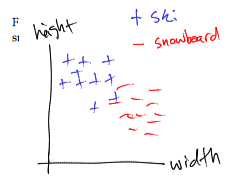
(Figure 3a)

However, if our measurement of the width was computed in millimeters instead of centimeters, this yields the data shown in Figure 3b. Since the width values are now tiny, in comparison to the height values, a KNN classiﬁer will effectively ignore the width values and classify almost purely based on height. The predicted class for the displayed test point had changed because of this feature scaling.

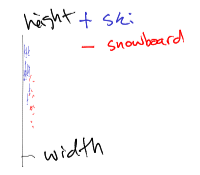
(Figure 3b)

We can use the following function to normalize features to avoid data distortion:

In [ ]:
def autoNorm(dataSet):
    minVal = dataSet.min(0)
    maxVal = dataSet.max(0)
    ranges = maxVal - minVal
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVal, (m, 1))
    normDataSet = normDataSet/tile(ranges, (m, 1))
    return normDataSet

## Example application

In this section, we will use the classic Iris flower data set introduced by the British statistician and biologist Ronald Fisher in 1936 to demonstrate how KNN can be used to classify Iris species. The dataset is composed of 150 observations of iris flowers from three different species. There are 4 measurements of given flowers: sepal length, sepal width, petal length and petal width, all in the same unit of centimeters. The predicted attribute is the species, which is one of setosa, versicolor or virginica.

It is a standard dataset where the species is known for all instances. As such we can split the data into training and test datasets and use the results to evaluate our algorithm implementation. Good classification accuracy on this problem is above 90% correct, typically 96% or better.

We can break down the implementation into the following steps:
1. Import data
2. Calculate distance
3. Locate k most closest data instances
4. Generate prediction
5. Test the accuracy of predictions

### 1. Import data

First thing first, we need to laod the dataset in CSV format into the model. You should be quite farmiliar with this process, so we won't get into details here:

In [ ]:
import csv
import random

def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, "r", encoding="utf8") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

Now we can use the loadDataset function to import the iris flowers dataset:

In [ ]:
trainingSet=[]
testSet=[]
loadDataset('iris.data.csv', 0.66, trainingSet, testSet)
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet))) 

For our implementation, this returns the following output
```python
>>> loadDataset('iris.data.csv', 0.66, trainingSet, testSet)
Train: 100
Test: 50
```
Since we use random module to randomly assign selections to training dataset or test dataset, the values might be different.

We can take a look at the data by creating a scatterpot using Matplotlib, as the following code snippet demonstrates.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1)
ax = fig.add_subplot(111)
totalSet = np.concatenate((trainingSet, testSet), axis=0)
colors = np.where(totalSet[:, -1]== "Iris-setosa",'r','-')
colors[totalSet[:, -1] == "Iris-versicolor"] = 'g'
colors[totalSet[:, -1] == 'Iris-virginica'] = 'b'
ax.scatter(totalSet[:, 0], totalSet[:, 1], c = colors, alpha = 0.8)
plt.show()

### 2. Calculate distance
As discussed above, we use Euclidean distance to find the K nearest neighbors of datapoints. Below is the code snippet: 

In [ ]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

You can test the function with some sample data as follows:

In [ ]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print('Distance: ' + repr(distance))

For our implementation, this returns the following output
```python
Distance: 3.4641016151377544
```
### 3. Locate K most closest data instances

Now we are ready to identify the k nearest/most similar instances for a given unseen instance. Below is the getNeighbors function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function).

In [ ]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

You can test the function with some sample data as follows:

In [ ]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

For our implementation, this returns the following output:
`[[4, 4, 4, 'b']]`

### 4. Generate prediction

Once we have located the most similar neighbors for a test instance, we can generate prediction based on those neighbors. We can do this by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.

Below provides a function for getting the majority voted response from a number of neighbors. 

In [ ]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

We can test out this function with some test neighbors, as follows:

In [ ]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

The result of this test is 'a'.

### 5. Test the accuracy of predictions
Now that we have the result of classification prediction, we can evaluate the accuracy of the model by calculating a ratio of the total correct predictions out of all predictions made, which is called the classification accuracy. 

Below is the getAccuracy function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

We can test this function with a test dataset and predictions, as follows:

In [ ]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

The result of the above testing code is 66.66666666666666.

## Putting together

We now have all the elements of the algorithm and we can tie them together with a main function. Below is the complete example of implementing the kNN algorithm from scratch in Python.

In [ ]:
#prepare data
trainingSet=[]
testSet=[]
split = 0.67
loadDataset('iris.data.csv', split, trainingSet, testSet)
print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet))) 

# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
accuracy = getAccuracy(testSet, predictions)

print('Accuracy: ' + repr(accuracy) + '%')

The result of the above code snippet would be the following:
```python
Train set: 105
Test set: 44
Accuracy: 97.72727272727273%
```
We can conclude that the model normally generates a pretty good result (around 97%).

## Reference and Resource To Learn More

1. Hal Daumé III (2017). Geometry and Nearest Neighbors. CIML, Chapter 3.
2. Iris dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
3. Tutorial To Implement k-Nearest Neighbors in Python From Scratch. by Jason Brownlee on September 12, 2014 in Algorithms From Scratch. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
